In [10]:
import xidplus
import pylab as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
from xidplus import sed
SEDs,df =sed.berta_templates()
temps=[15,20,21,9,30,1,5,14,0]
SEDs=SEDs[temps,:,:]
t=[x+1 for x in temps]
t.insert(0,0)
df=df[df.columns[t]]

[24.0, 100.0, 160.0, 250.0, 350.0, 500.0]


In [12]:
b1=3
b2=4
z=100
t=1
Nbb_1=12
f1=np.power(10.0,Nbb_1)*SEDs[t,b1,z]
f2=np.power(10.0,Nbb_1)*SEDs[t,b2,z]

In [13]:
np.random.multivariate_normal([f1,f2],np.array([[0.3*f1,0.0],[0.0,0.3*f2]]))

array([ 21.4753324 ,  17.88884522])

(0, 30)

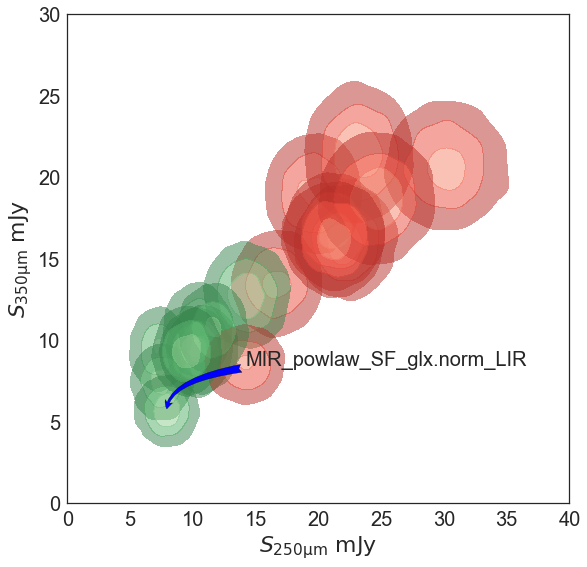

In [84]:
f, axis = plt.subplots(1, 1, figsize=(9, 9))
from matplotlib.patches import Ellipse
sns.set_style("white")
sns.set(font_scale=2.0)

for t in range(0,len(temps)):
    b1=3
    b2=4
    z1=100
    Nbb_1=12
    f1=np.power(10.0,Nbb_1)*SEDs[t,b1,z1]
    f2=np.power(10.0,Nbb_1)*SEDs[t,b2,z1]
    sns.kdeplot(np.random.multivariate_normal([f1,f2],
                                              np.array([[0.3*f1,0.0],[0.0,0.3*f2]]),size=20000)
                ,ax=axis,shade=True,shade_lowest=False,cmap="Reds_d",alpha=0.5,n_levels=3)
    z2=150
    Nbb_2=12
    f1=np.power(10.0,Nbb_2)*SEDs[t,b1,z2]
    f2=np.power(10.0,Nbb_2)*SEDs[t,b2,z2]
    sns.kdeplot(np.random.multivariate_normal([f1,f2],
                                              np.array([[0.3*f1,0.0],[0.0,0.3*f2]]),size=20000)
                ,ax=axis,shade=True,shade_lowest=False,cmap="Greens_d",alpha=0.5,n_levels=3)
    if t==6:
        axis.annotate(df.columns[t+1],
                xy=(np.power(10.0,Nbb_2)*SEDs[t,b1,z2], np.power(10.0,Nbb_2)*SEDs[t,b2,z2]), xycoords='data',
                xytext=(np.power(10.0,Nbb_1)*SEDs[t,b1,z1],np.power(10.0,Nbb_1)*SEDs[t,b2,z1]), textcoords='data',
                size=20,
                # bbox=dict(boxstyle="round", fc="0.8"),
                arrowprops=dict(arrowstyle="fancy",
                                fc="blue", ec="black",
                                connectionstyle="angle3,angleA=0,angleB=-90"))
axis.set_xlabel('$S_{250\mathrm{\mu m}}\ \mathrm{mJy}$')
axis.set_ylabel('$S_{350\mathrm{\mu m}}\ \mathrm{mJy}$')
axis.set_xlim(0,40)
axis.set_ylim(0,30)

In [28]:
red = np.arange(0, 8, 0.01)

In [90]:
red[150]

1.5

In [38]:
df.columns

Index(['wave', 'SF_Type1_AGN_1.norm_LIR', 'SF_Type2_AGN_2.norm_LIR',
       'SF_Type2_AGN_3.norm_LIR', 'PAH_DF_glx.norm_LIR',
       'WeakPAH_SF_glx_2.norm_LIR', 'BroadFIR_SF_glx.norm_LIR',
       'MIR_powlaw_SF_glx.norm_LIR', 'SF_glx_2.norm_LIR',
       'Blue_SF_glx.norm_LIR'],
      dtype='object')

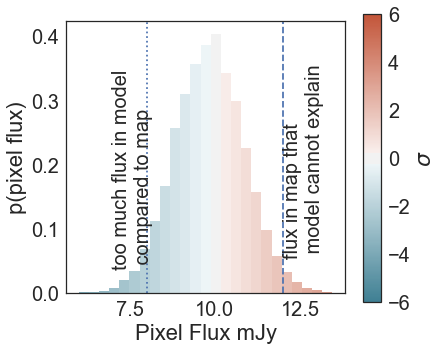

In [89]:
import matplotlib as mpl
sns.set_style("white")

fig=plt.figure(figsize=(5,5))

# Random gaussian data.
Ntotal = 15000
data = np.random.randn(Ntotal) + 10.0

# This is  the colormap I'd like to use.
cm = sns.diverging_palette(220, 20, as_cmap=True)

# Get the histogramp
Y,X = np.histogram(data, 25, normed=1)
#C = [cm(((x-X.min())/x_span)) for x in X]
C = [cm(((((x-np.mean(data))/np.std(data))+6)/12.0)) for x in X]


plt.bar(X[:-1],Y,color=C,width=X[1]-X[0])
plt.xlabel('Pixel Flux mJy')
plt.ylabel('p(pixel flux)')
plt.axvline(12, linestyle='--')
plt.axvline(8,linestyle=':')
plt.annotate('flux in map that \n model cannot explain',xy=(12, 0.1),  xycoords='data',
            xytext=(12, 0.3), textcoords='data',rotation='vertical',size='small')
plt.annotate('too much flux in model \n compared to map',xy=(7, 0.1),  xycoords='data',
            xytext=(7, 0.3), textcoords='data',rotation='vertical',size='small')

#ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
ax1 = fig.add_axes([0.95, 0.1, 0.05, 0.8])

norm = mpl.colors.Normalize(vmin=-6, vmax=6)
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cm,
                                norm=norm,
                                orientation='vertical')
cb1.set_label('$\sigma$')


In [50]:
np.std(data)

0.96884407466858791

## Distribution of Pvalue res statistics

A good measure of what blind sources are likely to be blends will be the `P_val_res` statistic in the XID+ catalogues. Lets look at the XID+ blind catalogues and the distribution of the `P_val_res` statistics

In [1]:
from astropy.table import Table

In [2]:
XIDpBLIND=Table.read('/Users/pdh21/Work/Astro/dmu_products/dmu22/dmu22_Lockman-SWIRE/dmu22_XID+SPIRE_Lockman-SWIRE_BLIND.fits')

In [30]:
XIDpBLIND
from astropy import units as u
XIDpBLIND['RA'].unit=u.deg
XIDpBLIND['Dec'].unit=u.deg

In [26]:
ysb=Table.read('./data/MRRfiles/fromPaper.txt', format='ascii')

In [32]:
ysb

RA,dec,i,S24,S250,S350,S500,zphot,type,2,nbands,zsubm,zcomb,sfr
float64,float64,float64,float64,float64,float64,float64,float64,str3,float64,int64,float64,float64,float64
159.03456,58.44533,21.37,1127.8,131.6,84.2,42.2,1.44,Scd,4.8,4,1.16,1.19,3.79
162.26817,58.46461,22.33,504.1,85.4,78.7,62.8,3.15,Sbc,5.0,6,3.16,3.17,3.87
160.33716,59.40493,22.36,1225.7,0.0,36.8,39.0,3.29,Scd,6.7,6,4.93,3.27,3.72
160.50839,58.67179,23.49,904.6,95.7,79.5,60.5,3.81,Sab,4.1,6,2.86,3.07,4.0
161.98271,58.07477,22.1,264.4,44.2,45.3,33.6,4.13,sb,25.4,6,3.15,3.68,3.76
162.33324,58.10657,22.61,516.4,56.9,52.9,59.6,2.8,Scd,6.1,8,4.09,2.89,3.73
160.9194,57.91475,22.32,682.3,116.5,102.0,65.4,3.06,Sab,20.5,6,2.56,2.8,4.05
161.21138,58.11261,23.29,560.2,148.6,116.4,54.2,3.33,Sbc,26.8,5,2.02,1.75,3.7
160.16505,57.27072,23.12,625.2,52.7,52.4,44.8,3.7,Sab,31.2,4,3.45,3.68,3.81


In [35]:
from astropy.coordinates import SkyCoord
from astropy import units as u
c = SkyCoord(ra=XIDpBLIND['RA'], dec=XIDpBLIND['Dec'])
catalog = SkyCoord(ra=ysb['RA']*u.degree, dec=ysb['dec']*u.degree)  
idx, d2d, d3d = catalog.match_to_catalog_sky(c)  

33

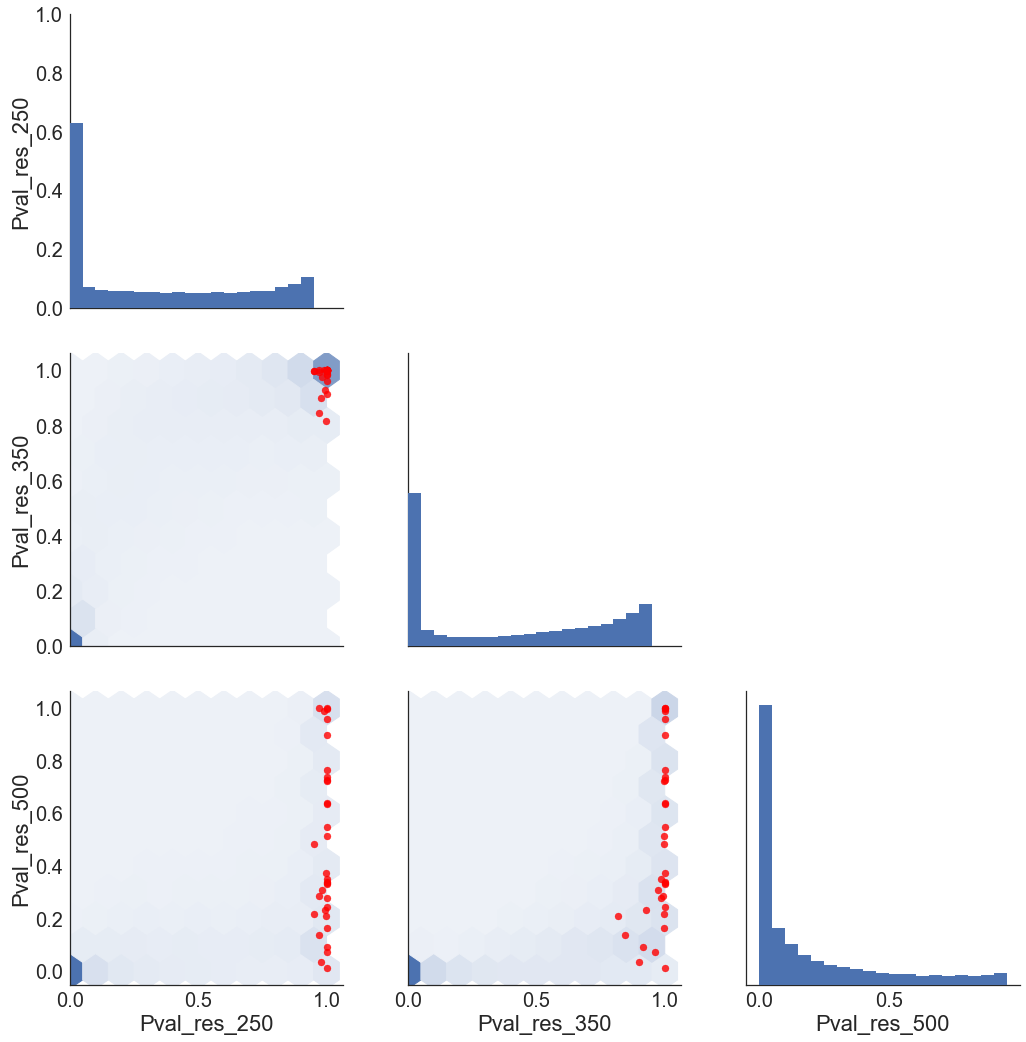

In [43]:
plt.figure(figsize=(10,10))
sns.set(font_scale=2.0)
sns.set_style("white")

# Borrowed from http://stackoverflow.com/a/31385996/4099925
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    ax = plt.gca()

    plt.hexbin(x, y, gridsize=10, cmap=cmap, extent=[0.0,1.0,0.0,1.0], **kwargs)

g=sns.PairGrid(XIDpBLIND['Pval_res_250','Pval_res_350','Pval_res_500'].to_pandas(),size=5)
g.map_diag(plt.hist,bins=np.arange(0,1.0,0.05))
g.map_lower(hexbin)

g.data=XIDpBLIND['Pval_res_250','Pval_res_350','Pval_res_500'][idx].to_pandas()
g.map_lower(plt.scatter, color='red',alpha=0.8)
g.axes[0,1].set_axis_off()
g.axes[0,2].set_axis_off()
g.axes[1,2].set_axis_off()
